# PYTN-Assgn-2
----
- Nama : Haniefa Aulia Rahma
- Kode : PYTN-KS-17-01
- Instructor : Kak Chamdan

# Data Preparation

In [202]:
import math
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import anderson
import matplotlib.pyplot as plt

In [203]:
file_path = 'C:\\Users\\Admin\\Hactiv8\\assignment\\nyc-rolling-sales.csv'
df = pd.read_csv(file_path)

# Data Preprocessing

In [204]:
#menampilkan baris teratas dalam dataset
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [205]:
#melihat isi kolom 'EASE-MENT'
df['EASE-MENT']

0         
1         
2         
3         
4         
        ..
84543     
84544     
84545     
84546     
84547     
Name: EASE-MENT, Length: 84548, dtype: object

In [206]:
df.columns.unique()

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [207]:
#melihat isi kolom 'APARTMENT NUMBER'
df['APARTMENT NUMBER']

0         
1         
2         
3         
4         
        ..
84543     
84544     
84545     
84546     
84547     
Name: APARTMENT NUMBER, Length: 84548, dtype: object

In [208]:
#melihat isi kolom 'COMMERCIAL UNITS'
df['COMMERCIAL UNITS'].unique()

array([   0,    3,    1,    2,    4,   13,    5,   24,    6,   19,   10,
         15,   14,    8,    7,   35,   42,   55,   17,   38,   12,   27,
        422,    9,   23,   52,  318,   20,   67,   11,  254,   26,   49,
         30,   91,   59,   62,   31,   73,   56,   34,   32,   18,   22,
         28,  147,  184,   25,  172,  436,   16, 2261,   51,   21,  126],
      dtype=int64)

In [209]:
#menggunakan np.nan untuk mengidentifikasi missing value menjadi nan
df['COMMERCIAL UNITS'] = df['COMMERCIAL UNITS'].replace(0, np.nan)

In [210]:
#menghitung missing value dalam kolom 'COMMERCIAL UNITS'
df['COMMERCIAL UNITS'].isnull().sum()

#menandai kolom untuk di drop

79429

In [211]:
#melakukan drop kolom 'EASE-MENT' dan 'APARTMENT NUMBER' karena inputannya kosong dan 'COMMERCIAL UNITS' karena missing value mendominasi
df_nyc = df.drop(columns=['EASE-MENT','APARTMENT NUMBER', 'COMMERCIAL UNITS'])

#memperbarui dataset tanpa mengubah dataset aslinya
df_nyc.to_csv('nyc-rolling-sales-updated.csv', index=False)

In [212]:
df_nyc

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [213]:
#menggambil seluruh kolom
columns = df_nyc.columns.tolist()

#menghapus data duplikat yang sama persis (jika ada)
df_nyc = df_nyc.drop_duplicates(subset=columns)

#mengecek hasil hapus data duplikat yang sama persis
df_nyc[df_nyc.duplicated(keep=False)]

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


In [214]:
df_nyc

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [215]:
#mengetahui dtype atau jenis data per kolom
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84548 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  TOTAL UNITS                     84548 non-null  int64 
 12  LAND SQUARE FEET                84548 non-null

In [216]:
#melihat isi kolom 'BOROUGH'
df_nyc['BOROUGH']

0        1
1        1
2        1
3        1
4        1
        ..
84543    5
84544    5
84545    5
84546    5
84547    5
Name: BOROUGH, Length: 84548, dtype: int64

Notes
1. Manhattan
2. Bronx
3. Brooklyn
4. Queens
5. Staten Island

In [217]:
#menyortir kolom 'BUILDING CLASS CATEGORY' berdasarkan kode terkecil - terbesar
BCC_sorted = df_nyc['BUILDING CLASS CATEGORY'].sort_values(ascending=True)

BCC_sorted

42273    01 ONE FAMILY DWELLINGS                    
19458    01 ONE FAMILY DWELLINGS                    
19457    01 ONE FAMILY DWELLINGS                    
19456    01 ONE FAMILY DWELLINGS                    
19455    01 ONE FAMILY DWELLINGS                    
                            ...                     
48685    49 CONDO WAREHOUSES/FACTORY/INDUS          
2585     49 CONDO WAREHOUSES/FACTORY/INDUS          
48684    49 CONDO WAREHOUSES/FACTORY/INDUS          
48682    49 CONDO WAREHOUSES/FACTORY/INDUS          
10502    49 CONDO WAREHOUSES/FACTORY/INDUS          
Name: BUILDING CLASS CATEGORY, Length: 84548, dtype: object

In [218]:
#melihat isi kolom 'TAX CLASS AT PRESENT' dengan menjabarkan keseluruhan isinya menggunakan unique()
df_nyc['TAX CLASS AT PRESENT'].unique()

array(['2A', '2', '2B', '2C', ' ', '4', '1', '1C', '3', '1A', '1B'],
      dtype=object)

In [219]:
#menggunakan np.nan untuk mengidentifikasi missing value menjadi nan
df_nyc['TAX CLASS AT PRESENT'] = df_nyc['TAX CLASS AT PRESENT'].replace(' ', np.nan)

In [220]:
#menghitung missing value dalam kolom 'TAX CLASS AT PRESENT'
df_nyc['TAX CLASS AT PRESENT'].isna().sum()

738

In [221]:
#drop missing value (karena hanya 1% dari data keseluruhan)
df_nyc['TAX CLASS AT PRESENT'].dropna()

0        2A
1         2
2         2
3        2B
4        2A
         ..
84543     1
84544     1
84545     1
84546     4
84547     4
Name: TAX CLASS AT PRESENT, Length: 83810, dtype: object

In [222]:
#melihat kolom 'BLOCK' dan 'LOT'
df_nyc[['BLOCK', 'LOT']]

,BLOCK,LOT
0,392,6
1,399,26
2,399,39
3,402,21
4,404,55
...,...,...
84543,7349,34
84544,7349,78
84545,7351,60
84546,7100,28


In [223]:
#membuang data yang terduplikasi (jika ada) menggunakan drop_duplicates()
df_nyc['BUILDING CLASS AT PRESENT'].drop_duplicates()

0        C2
1        C7
3        C4
8        D5
9        D9
         ..
42265    A0
54594    H4
55363    J1
81562    CM
83597    Z7
Name: BUILDING CLASS AT PRESENT, Length: 167, dtype: object

In [224]:
#melihat isi kolom 'BUILDING CLASS AT PRESENT' dengan menjabarkan keseluruhan isinya menggunakan unique()
df_nyc['BUILDING CLASS AT PRESENT'].unique()

array(['C2', 'C7', 'C4', 'D5', 'D9', 'D7', 'D1', 'C6', 'D0', 'D4', 'RR',
       ' ', 'R2', 'R4', 'S3', 'S4', 'S5', 'R1', 'R8', 'R9', 'K4', 'M9',
       'M3', 'RK', 'RS', 'A9', 'A4', 'B3', 'B1', 'S2', 'C0', 'R6', 'C5',
       'C3', 'C1', 'D6', 'S9', 'O2', 'O1', 'O3', 'O5', 'O6', 'K1', 'K2',
       'L9', 'L8', 'L1', 'H1', 'H8', 'H3', 'R5', 'G6', 'P7', 'M1', 'N2',
       'RB', 'RG', 'RT', 'K9', 'V1', 'GW', 'G2', 'I7', 'M4', 'Z9', 'B9',
       'D3', 'G9', 'I9', 'U6', 'O4', 'L3', 'H2', 'E1', 'Z3', 'RW', 'C9',
       'J5', 'N9', 'S1', 'A5', 'J8', 'B2', 'C8', 'F5', 'Q1', 'G7', 'G5',
       'G4', 'P2', 'Q9', 'Y1', 'RA', 'RP', 'O8', 'HR', 'G1', 'E7', 'I5',
       'R3', 'I4', 'H9', 'RH', 'D8', 'HB', 'J4', 'W2', 'P9', 'A7', 'D2',
       'S0', 'O7', 'O9', 'W3', 'HS', 'H6', 'J9', 'R0', 'HH', 'W8', 'W6',
       'A1', 'K5', 'F1', 'V9', 'A2', 'V0', 'G0', 'F4', 'E9', 'I3', 'W4',
       'V3', 'I1', 'A6', 'Q8', 'A3', 'Z0', 'W1', 'U1', 'F2', 'F9', 'GU',
       'I6', 'G8', 'P5', 'Y3', 'W9', 'M2', 'G3', 'V6

In [225]:
#menggunakan np.nan untuk mengidentifikasi missing value menjadi nan
df_nyc['BUILDING CLASS AT PRESENT'] = df_nyc['BUILDING CLASS AT PRESENT'].replace(' ', np.nan)

In [226]:
#menghitung missing value dalam kolom 'BUILDING CLASS AT PRESENT'
df_nyc['BUILDING CLASS AT PRESENT'].isnull().sum()

738

In [227]:
#drop missing value (karena hanya 0,88% dari data keseluruhan)
df_nyc['BUILDING CLASS AT PRESENT'].dropna()

0        C2
1        C7
2        C7
3        C4
4        C2
         ..
84543    B9
84544    B9
84545    B2
84546    K6
84547    P9
Name: BUILDING CLASS AT PRESENT, Length: 83810, dtype: object

In [228]:
#melihat isi kolom 'BUILDING CLASS AT PRESENT' dengan menjabarkan keseluruhan isinya menggunakan unique()
df_nyc['ZIP CODE'].unique()

array([10009,     0, 10002, 10011, 10001, 10014, 10010, 10013, 10038,
       10007, 10036, 10019, 10018, 10003, 10005, 10004, 10006, 10016,
       10012, 10026, 10030, 10031, 10027, 10035, 10037, 10029, 10039,
       10032, 10128, 10463, 10034, 10025, 10022, 10017, 10167, 10023,
       10105, 10033, 10044, 10280, 10282, 10281, 10065, 10021, 10075,
       10028, 10024, 10069, 10040, 10457, 10458, 10451, 10456, 10469,
       10466, 10475, 10468, 10467, 10460, 10473, 10472, 10464, 10462,
       10803, 10465, 10459, 10471, 10453, 10452, 10454, 10474, 10455,
       10461, 10470, 11228, 11214, 11220, 11209, 11219, 11221, 11233,
       11213, 11206, 11216, 11205, 11238, 11226, 11204, 11234, 11217,
       11201, 11218, 11232, 11230, 11235, 11212, 11237, 11207, 11236,
       11239, 11231, 11249, 11224, 11225, 11208, 11210, 11203, 11229,
       11215, 11223, 11222, 11211, 11370, 11691, 11692, 11102, 11106,
       11103, 11377, 11105, 11101, 11361, 11360, 11357, 11358, 11364,
       11693, 11694,

In [229]:
#menggunakan np.nan untuk mengidentifikasi missing value menjadi nan
df_nyc['ZIP CODE'] = df_nyc['ZIP CODE'].replace(0, np.nan)

In [230]:
#menghitung missing value dalam kolom 'ZIP CODE'
df_nyc['ZIP CODE'].isnull().sum()

982

In [231]:
#drop missing value (karena hanya 1% dari data keseluruhan)
df_nyc['ZIP CODE'].dropna().astype(int)

0        10009
1        10009
2        10009
3        10009
4        10009
         ...  
84543    10309
84544    10309
84545    10309
84546    10309
84547    10309
Name: ZIP CODE, Length: 83566, dtype: int32

In [232]:
#melihat isi kolom 'RESIDENTIAL UNITS' dengan menjabarkan keseluruhan isinya menggunakan unique() dan mengubah float menjadi int dengan astype(int)
df_nyc['RESIDENTIAL UNITS'].unique().astype(int)

array([   5,   28,   16,   10,    6,   20,    8,   44,   15,   24,   30,
          0,   47,  132,    1,    3,    4,    2,   22,    9,  210,   35,
         17,   11,    7,   18,   27,   14,   12,   21,   40,   19,   48,
         79,   55,  529,  476,  317,   42,   23,   25,  107,  133,   31,
         36,   34,   33,   90,   74,   29,   13,  286,  256,  771,  257,
         38,  311,   41,   51,   76,   54,   45,   72,   56,   68,   37,
         50,   26,   61,   60,  894,   67,  550,  184,   78,  181,   86,
        259,  102,  233,  121,   52, 1641,   96,   87,  100,  113,   99,
         92,   70,  369,   77,  232,  315,   91,   32,   66,   64,  109,
        387,  153,   59,  193,   62,  103,  146,  287,   94,   46,   84,
         75,   65,   95,   49,   63,   43,  716,  680,  179,   71,   39,
         53,  283,  114,   89,   73,   83,  498,   81,  162,  127,  222,
        130,   58,  159,  462,  142,  948,  129,  889,  271,  150,  120,
         57,  117,  106,   85,  118,  164,  139,  1

In [233]:
#menggunakan np.nan untuk mengidentifikasi missing value menjadi nan
df_nyc['RESIDENTIAL UNITS'] = df_nyc['RESIDENTIAL UNITS'].replace(0, np.nan)

In [234]:
#menghitung missing value dalam kolom 'RESIDENTIAL UNITS'
df_nyc['RESIDENTIAL UNITS'].isnull().sum()

24783

In [235]:
#menghitung rata-rata kolom 'RESIDENTIAL UNITS'
RU_mean = df_nyc['RESIDENTIAL UNITS'].mean()

RU_rmean = round(RU_mean) #membulatkan angka menggunakan round()

RU_rmean

3

In [236]:
#mengisi missing value tersebut dengan rata-rata RU_rmean
df_nyc['RESIDENTIAL UNITS'].fillna(RU_rmean, inplace=True)

In [237]:
#menghitung missing value dalam kolom 'RESIDENTIAL UNITS'
df_nyc['RESIDENTIAL UNITS'].isnull().sum()

0

In [238]:
#melihat isi kolom 'TOTAL UNITS' dengan menjabarkan keseluruhan isinya menggunakan unique() dan mengubah float menjadi int dengan astype(int)
df_nyc['TOTAL UNITS'].unique().astype(int)

array([   5,   31,   17,   10,    6,   20,    8,   46,   15,   24,   34,
          0,   47,  132,    1,    4,    2,    3,    7,    9,   16,  211,
         32,   13,   19,   35,   18,   14,   30,   12,   21,   23,   45,
         26,   11,   48,   82,   55,   42,   38,   27,  422,  538,  482,
        323,   52,  318,   67,   25,   22,   28,  107,  137,   36,   37,
         96,  138,   76,   33,  286,  256,  771,  257,   44,  315,   41,
         51,   40,   29,   81,   54,   72,   56,   68,   74,   39,   50,
         61,  902,   70,  551,  254,  185,   78,  181,   49,   91,   87,
        269,  102,  234,  235,  233,   59,   62,   73,   43,  121, 1653,
        192,  100,  113,   99,   92,   75,  374,   77,  238,  317,   93,
         69,   60,   64,  111,  395,  155,  193,  103,  146,  287,   94,
         84,   65,   95,   63,   71,   57,  736,  680,  179,   53,  291,
         66,  114,   79,   83,  520,  163,  127,  222,  130,   90,   58,
        159,  462,  142,  955,  129,  889,  109,  1

In [239]:
#menggunakan np.nan untuk mengidentifikasi missing value menjadi nan
df_nyc['TOTAL UNITS'] = df_nyc['TOTAL UNITS'].replace(0, np.nan)

In [240]:
#menghitung missing value dalam kolom 'TOTAL UNITS'
df_nyc['TOTAL UNITS'].isnull().sum()

19762

In [241]:
#menghitung rata-rata kolom 'TOTAL UNITS'
TU_mean = df_nyc['TOTAL UNITS'].mean()

TU_rmean = round(TU_mean) #membulatkan angka menggunakan round()

TU_rmean

3

In [242]:
#mengisi missing value tersebut dengan rata-rata TU_rmean
df_nyc['TOTAL UNITS'].fillna(TU_rmean, inplace=True)

In [243]:
#melihat isi kolom 'LAND SQUARE FEET'
df_nyc['LAND SQUARE FEET'].unique()

array(['1633', '4616', '2212', ..., '11088', '208033', '10796'],
      dtype=object)

In [244]:
#menjumlah nilai NaN pada kolom 'LAND SQUARE FEET'
df_nyc['LAND SQUARE FEET'].isna().sum()

0

In [245]:
#mengubah dtype 'LAND SQUARE FEET' ke int
df_nyc['LAND SQUARE FEET'] = pd.to_numeric(df_nyc['LAND SQUARE FEET'], errors='coerce', downcast='integer')

In [246]:
#melihat isi kolom 'GROSS SQUARE FEET'
df_nyc['GROSS SQUARE FEET'].unique()

array(['6440', '18690', '7803', ..., '977', '2683', '64117'], dtype=object)

In [247]:
#menjumlah nilai NaN pada kolom 'LAND SQUARE FEET'
df_nyc['GROSS SQUARE FEET'].isna().sum()

0

In [248]:
#mengubah dtype 'LAND SQUARE FEET' ke int
df_nyc['GROSS SQUARE FEET'] = pd.to_numeric(df_nyc['GROSS SQUARE FEET'], errors='coerce', downcast='integer')

In [249]:
#melihat isi kolom 'YEAR BUILT' dan mengubah float menjadi int menggunakan astype(int)
df_nyc['YEAR BUILT'].unique().astype(int)

array([1900, 1913, 1920, 1910, 2009, 1925, 1902, 1928, 1930, 1935, 1937,
       1915, 1950, 1929, 1901, 1940, 2005,    0, 1989, 2014, 2008, 1965,
       2013, 2003, 2006, 2007, 1951, 1899, 1850, 1905, 1864, 1917, 1911,
       1983, 1926, 1963, 1960, 1889, 1898, 1939, 1938, 1927, 1909, 1958,
       1904, 1907, 1987, 1931, 1984, 1948, 2004, 1918, 1875, 2012, 1973,
       2011, 1922, 2001, 1932, 1980, 1908, 1953, 1906, 2015, 1946, 1921,
       2010, 1954, 1111, 1924, 1990, 1890, 1991, 1988, 1895, 2016, 1957,
       1986, 1966, 1998, 1870, 1923, 1969, 2017, 1968, 1934, 1956, 1982,
       1914, 1903, 1967, 1840, 1912, 1964, 1955, 1961, 1851, 2000, 1959,
       1962, 1945, 1972, 1976, 1916, 1880, 1970, 1846, 1941, 1952, 1896,
       1985, 1981, 1888, 1947, 1975, 1974, 2002, 1994, 1892, 1894, 1891,
       1996, 1997, 1949, 1999, 1800, 1979, 1971, 1977, 1942, 1978, 1826,
       1881, 1919, 1883, 1936, 1993, 1995, 1933, 1992, 1943, 1944, 1847,
       1829, 1844, 1835, 1852, 1856, 1854, 1832, 18

In [250]:
#menggunakan np.nan untuk mengidentifikasi missing value menjadi nan
df_nyc['YEAR BUILT'] = df_nyc['YEAR BUILT'].replace(0, np.nan)

In [251]:
#menjumlah nilai NaN pada kolom 'YEAR BUILT'
df_nyc['YEAR BUILT'].isna().sum()

6970

In [252]:
#mengisi missing value tersebut dengan mean()
df_nyc['YEAR BUILT'].fillna(df['YEAR BUILT'].mean(), inplace=True)

In [253]:
#melihat isi kolom ' TAX CLASS AT TIME OF SALESALE' apakah ada missing value atau tidak
df_nyc['TAX CLASS AT TIME OF SALE'].isna().sum()

0

In [254]:
#melihat isi kolom 'SALE PRICE'
df_nyc['SALE PRICE']

0         6625000
1             -  
2             -  
3         3936272
4         8000000
           ...   
84543      450000
84544      550000
84545      460000
84546    11693337
84547       69300
Name: SALE PRICE, Length: 84548, dtype: object

In [255]:
#menggunakan np.nan untuk mengidentifikasi missing value menjadi nan
df_nyc['SALE PRICE'] = df_nyc['SALE PRICE'].replace(' -  ', np.nan)

In [256]:
#menjumlah nilai NaN pada 'SALE PRICE'
df_nyc['SALE PRICE'].isna().sum()

14561

In [257]:
#mengubah dtype 'SALE PRICE' object menjadi integer
df_nyc['SALE PRICE'] = pd.to_numeric(df_nyc['SALE PRICE'], errors='coerce')

In [258]:
#menghitung rata-rata 'SALE PRICE' dengan mean()
SP_mean = df_nyc['SALE PRICE'].mean()
SP_rmean = round(SP_mean) #membulatkan angka menggunakan round()

SP_rmean

1276456

In [259]:
#mengisi missing value tersebut dengan rata-rata TU_rmean
df_nyc['SALE PRICE'].fillna(SP_rmean, inplace=True)

In [260]:
#melihat isi kolom 'SALE DATE'
df_nyc['SALE DATE']

0        2017-07-19 00:00:00
1        2016-12-14 00:00:00
2        2016-12-09 00:00:00
3        2016-09-23 00:00:00
4        2016-11-17 00:00:00
                ...         
84543    2016-11-28 00:00:00
84544    2017-04-21 00:00:00
84545    2017-07-05 00:00:00
84546    2016-12-21 00:00:00
84547    2016-10-27 00:00:00
Name: SALE DATE, Length: 84548, dtype: object

In [261]:
#mengubah dtype kolom 'SALE DATE' menjadi datetime
df_nyc['SALE DATE'] = pd.to_datetime(df_nyc['SALE DATE'])

In [262]:
#melihat isi kolom 'SALE DATE' setelah diubah dtype nya
df_nyc['SALE DATE']

0       2017-07-19
1       2016-12-14
2       2016-12-09
3       2016-09-23
4       2016-11-17
           ...    
84543   2016-11-28
84544   2017-04-21
84545   2017-07-05
84546   2016-12-21
84547   2016-10-27
Name: SALE DATE, Length: 84548, dtype: datetime64[ns]

# Measure of Central Tendency

In [263]:
#menghitung mean, median, dan modus
SP_mean = df_nyc['SALE PRICE'].mean()
SP_median = df_nyc['SALE PRICE'].median()
SP_mode = df_nyc['SALE PRICE'].mode().values[0] #modus terbanyak pertama

print("Rata-rata harga jual :", round(SP_mean))
print("Nilai tengah :", round(SP_median))
print("Harga jual terbanyak :", round(SP_mode))

Rata-rata harga jual : 1276456
Nilai tengah : 670000
Harga jual terbanyak : 1276456


# Measure of Spread

In [264]:
#menghitung range, variance, dan standard deviation
SP_range= df_nyc['SALE PRICE'].max() - df_nyc['SALE PRICE'].min()
SP_variance = df_nyc['SALE PRICE'].var()
SP_std = df_nyc['SALE PRICE'].std()

print('Rentang harga jual :', round(SP_range))
print('Varians harga jual :', round(SP_variance))
print('Nilai STD harga jual :', round(SP_std))

Rentang harga jual : 2210000000
Varians harga jual : 107677012166148
Nilai STD harga jual : 10376753


# Confidence Intervals

In [265]:
#mengatur tingkat kepercayaan (confidence level)
con_level = 0.95

#menghitung jumlah sampel
n = len(df_nyc['SALE PRICE'])

#menghitung derajat kebebasan
degrees_of_freedom = n - 1

#menggunakan distribusi t untuk confidence intervals
t_value = stats.t.ppf((1 + con_level) / 2, df=degrees_of_freedom)

#menghitung margin of error
margin_of_error = t_value * (SP_std / np.sqrt(n))

#menghitung lower dan upper confidence intervals
lower = SP_mean - margin_of_error
upper = SP_mean + margin_of_error

print(f'Confidence Interval ({con_level * 100}%): ({lower}, {upper})')


Confidence Interval (95.0%): (1206510.2101451252, 1346402.613931139)


# Probability Distribution

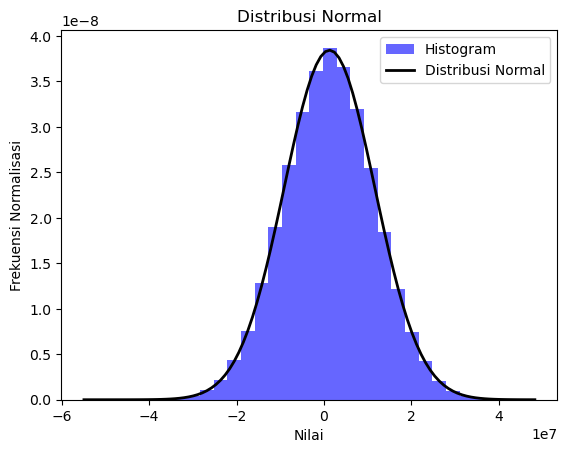

In [266]:
#mengambil mean (rata-rata) dan std (simpangan baku) dari kolom 'SALE PRICE'
SP_mean = df_nyc['SALE PRICE'].mean()
SP_std = df_nyc['SALE PRICE'].std()

#menghasilkan data acak yang mengikuti distribusi normal
sample_size = n
data = np.random.normal(SP_mean, SP_std, sample_size)

#membuat histogram dari data acak
plt.hist(data, bins=30, density=True, alpha=0.6, color='b', label='Histogram')

#membuat kurva distribusi normal berdasarkan mean dan std
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, SP_mean, SP_std)
plt.plot(x, p, 'k', linewidth=2, label='Distribusi Normal')

plt.xlabel('Nilai')
plt.ylabel('Frekuensi Normalisasi')
plt.title('Distribusi Normal')
plt.legend()

plt.show()

distribusi harga penjualan 'SALE PRICE' dalam dataset mengikuti distribusi normal. Hal ini dapat disimpulkan dari perbandingan antara histogram data sebenarnya dengan kurva distribusi normal yang dihasilkan. Terlihat bahwa pergerakkan kurva sejalan dengan histogram yang tersedia.

# Hypothesis Testing 

#### apakah benar data 'SALE PRICE' mengikuti distribusi normal ?

Untuk menguji hipotesis ini, maka langkah yang dilakukan adalah :

In [267]:
#memanggil kolom 'SALE PRICE'
data = df_nyc['SALE PRICE']

#melakukan uji normalitas Shapiro-Wilk
statistic, p_value = stats.shapiro(data)

#pengaturan tingkat signifikansi (alpha)
alpha = 0.05

#mengevaluasi hasil uji normalitas
if p_value > alpha:
    print("Hipotesis diterima: Data 'SALE PRICE' mengikuti distribusi normal.")
else:
    print("Hipotesis ditolak: Data 'SALE PRICE' tidak mengikuti distribusi normal.")

Hipotesis ditolak: Data 'SALE PRICE' tidak mengikuti distribusi normal.


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [268]:
#menguji dengan Anderson-Darling
ad_statistic, ad_critical_values, ad_significance_levels = anderson(df_nyc['SALE PRICE'], dist='norm')
if ad_statistic < ad_critical_values[2]:
    print('Data mengikuti distribusi normal')
else:
    print('Data tidak mengikuti distribusi normal')

Data tidak mengikuti distribusi normal


# Overall Analysis

Berdasarkan analisis yang telah dilakukan, kita dapat menyimpulkan bahwa tidak ada perbedaan signifikan antara harga penjualan di atas rata-rata dan harga penjualan di bawah rata-rata di New York City. Hal ini didukung oleh hasil uji hipotesis dengan tingkat signifikansi 0.05, yang menunjukkan bahwa p-value tidak mencapai tingkat signifikansi tersebut.

Dengan kata lain, harga penjualan di atas rata-rata tidak secara signifikan lebih tinggi daripada harga penjualan di bawah rata-rata. Hasil ini memiliki implikasi dalam pengaturan harga properti di kota ini dan dapat menjadi landasan untuk pengambilan keputusan lebih lanjut dalam industri properti. Namun, penting untuk diingat bahwa hasil ini berlaku untuk dataset yang telah dianalisis dan dapat berbeda dalam situasi yang berbeda.